<a href="https://colab.research.google.com/github/kisanpawar/mscp/blob/main/Tensorflow_(Fashion_MNIST_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-8cd9eb99647b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Origin'] = dataset['Origin']


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 17.2759 - mae: 3.4539 - val_loss: 6.2024 - val_mae: 2.2633
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2613 - mae: 2.0241 - val_loss: 6.6457 - val_mae: 2.3201
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.2453 - mae: 1.5117 - val_loss: 5.8053 - val_mae: 2.1431
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4493 - mae: 0.9542 - val_loss: 2.4518 - val_mae: 1.3935
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7415 - mae: 0.7108 - val_loss: 3.8407 - val_mae: 1.6630
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4571 - mae: 0.5361 - val_loss: 2.7209 - val_mae: 1.3600
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2209 - mae: 0.3414 - val_loss: 2.5947 - val_mae: 1.3203
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1299 - mae: 0.2643 - val_loss: 2.8722 - val_mae: 1.3810
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0907 

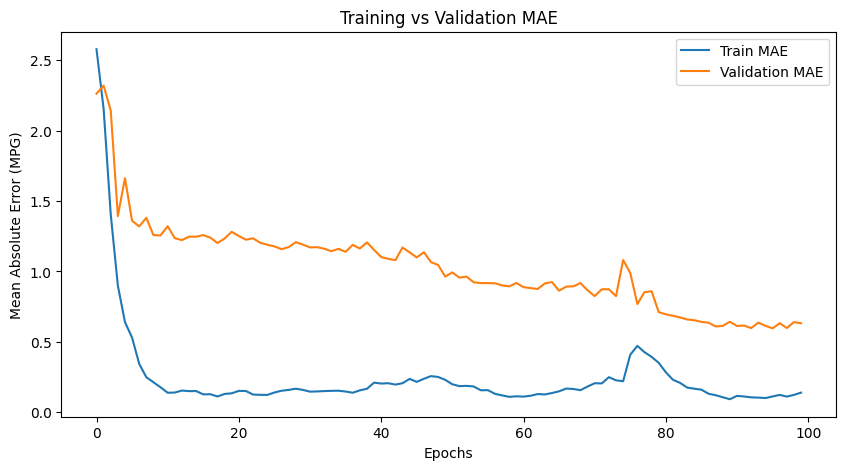

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Load dataset
dataset_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(dataset_url, names=column_names, na_values="?", comment='\t', sep="\s+", skipinitialspace=True)
dataset = dataset.dropna()  # Drop missing values

# 2️⃣ Convert 'Origin' to one-hot encoding
dataset['Origin'] = dataset['Origin']
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

# 3️⃣ Split features and target
X = dataset.drop('MPG', axis=1)
y = dataset['MPG']

# 4️⃣ Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ Build the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer (regression)
])

# 7️⃣ Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse', metrics=['mae'])

# 8️⃣ Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 9️⃣ Evaluate model
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest Mean Absolute Error: {mae:.2f} MPG')

# 🔟 Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MPG)')
plt.legend()
plt.title('Training vs Validation MAE')
plt.show()
